# Visualise feature maps of a CNN

In [1]:
import torch
import torchvision.models as models
from torchvision import transforms
import matplotlib.pyplot as plt
import PIL


In [2]:
# Load pre-trained model
# https://pytorch.org/vision/main/models.html
model = models.vgg16(pretrained=True)

# Set model to evaluation mode
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:05<00:00, 101MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [3]:
# Load an example image
image_path = '/content/panda.jpeg'
image = PIL.Image.open(image_path)

In [4]:
# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add batch dimension

In [5]:
# If GPU available, move input and model to GPU
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

In [20]:
# Function to hook into the feature map of a layer
feature_maps = None
def hook_fn(module, input, output):
    global feature_maps
    feature_maps = output

In [21]:
# Select a layer to visualize its feature maps
# For VGG, you can select any convolutional layer
selected_layer = model.features[1]  # Example: 12th layer in VGG16

In [22]:
# Register hook to the selected layer
hook = selected_layer.register_forward_hook(hook_fn)

# Forward pass
with torch.no_grad():
    output = model(input_batch)

# Remove the hook
hook.remove()

In [23]:
feature_maps.shape

torch.Size([1, 64, 224, 224])

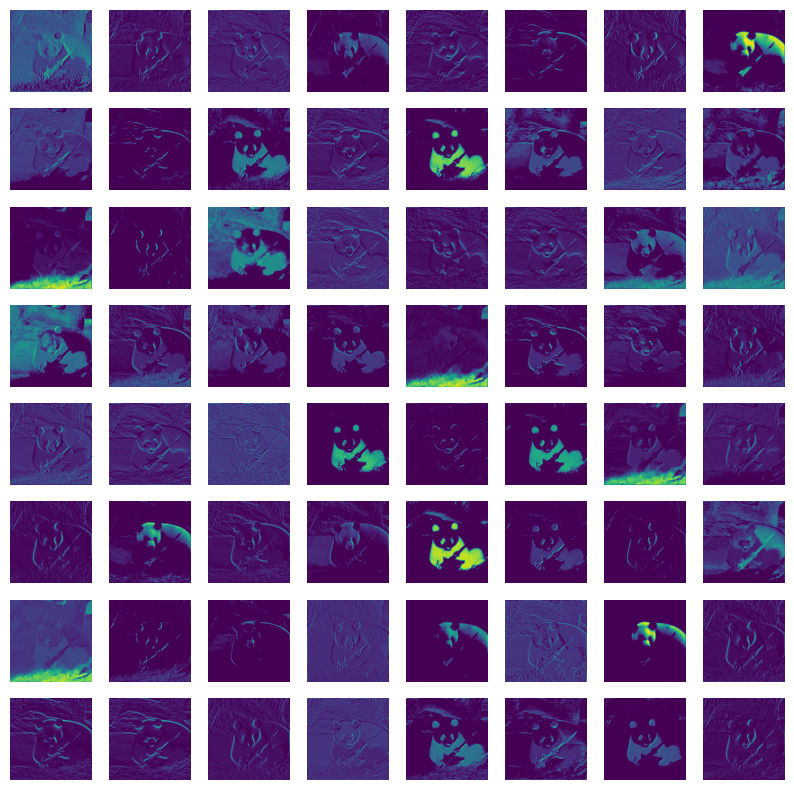

In [24]:
# Visualize the feature maps
# Assuming feature_maps is a tensor of shape (1, num_channels, height, width)
feature_maps = feature_maps.squeeze(0)  # Remove batch dimension
num_channels = feature_maps.size(0)

# Plot each channel as a separate subplot
plt.figure(figsize=(10, 10))
for i in range(num_channels):
  if (i<8*8):
    plt.subplot(8, 8, i+1)
    plt.imshow(feature_maps[i].cpu(), cmap='viridis')
    plt.axis('off')
plt.show()